# Trees in Camden. Assessment the Quality of a Dataset for a Public Service Agency


These upcoming projects are a part of the council’s new data initiative:

- Public Tree Data
Provide a list of all trees in the borough, which can be downloaded by the public for free from the Camden Council website. The Borough of Camden is committed to the “opendata” initiative and are interested in opening their data as much as possible to its citizens and to the world.

- Tree Walks Brochures
Create a series of “Tree Walks” brochures, each one of which is a guided walk around an individual park showing a map of the location of interesting trees.

- Environment Report
Put up a single page on the Camden Council website showing the total carbon and pollution benefit provided by all their trees. This will also show information about trees removed, trees planted and the net carbon and pollution impact of this activity.


Data we have:

1. Trees Data
A list of all the trees in the borough (both their location and types). This is an Excel file which was downloaded from the Council website.

2. Environmental Data
An extract from the council assets database which lists all the trees and gives some environmental data about each tree. This is a csv file.

3. Common Names Data
A list of scientific tree names and their matching common names. It was got from a horticultural website and it’s in json format.

The team are unsure as to whether the data they have can be used to deliver these projects.

**The task is to evaluate the data and determine the extent to which this is possible.**

## Imports
Import the libraries we need to perform the analysis.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Task 2: Load Data and Perform Initial Exploration



### 2.1 Trees


In [2]:
trees = pd.read_excel("D:\\Work\\OpenClassroom\\Project 3 Python\\camden_trees.xlsx")

Display the first few rows.

In [3]:
trees.head()

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
0,00060053,1.0,Russell Nurseries Estate,Housing,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000135,Hampstead Town,527305.0,185240.0,-0.165240,51.551693,"(51.551693, -0.16524)"
1,00057855,1.0,BRECKNOCK JMI (E),Education,Vacant Tree Pit,2019-07-17,2022/2023,NaN,NaN,NaN,E05000131,Cantelowes,529923.0,184782.0,-0.127681,51.546984,"(51.546984, -0.127681)"
2,00059953,1.0,Estate 51 Ravenshaw Street,Housing,Ficus carica,NaT,NaN,5.0,4.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,00059915,1.0,ROSARY RC JMI (E),Education,Betula jacquemontii,NaT,NaN,4.0,1.0,6.0,E05000135,Hampstead Town,527249.0,185261.0,-0.166051,51.551901,"(51.551901, -0.166051)"
4,00010762,1.0,Holly Lodge Estate,Housing,Ilex x altaclarensis,2017-06-14,2020/2021,14.0,6.0,26.0,E05000137,Highgate,528414.0,186770.0,-0.148704,51.565198,"(51.565198, -0.148704)"


To understand the size of the dataset we are dealing with:

In [4]:
trees.shape

(23444, 17)

There are lots of columns we can't see all of them in the `head()` list above.  Use the `columns` property to get a full list:

In [5]:
trees.columns

Index(['Identifier', 'Number Of Trees', 'Site Name', 'Contract Area',
       'Scientific Name', 'Inspection Date', 'Inspection Due Date',
       'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height', 'Ward Code', 'Ward Name',
       'Easting', 'Northing', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In order to process the data properly, we should understand the data type for each column.

In [6]:
trees.dtypes

Identifier                                          object
Number Of Trees                                    float64
Site Name                                           object
Contract Area                                       object
Scientific Name                                     object
Inspection Date                             datetime64[ns]
Inspection Due Date                                 object
Height In Metres                                   float64
Spread In Metres                                   float64
Diameter In Centimetres At Breast Height           float64
Ward Code                                           object
Ward Name                                           object
Easting                                            float64
Northing                                           float64
Longitude                                          float64
Latitude                                           float64
Location                                            obje

<hr/>

### 2.2 Environmental


In [7]:
environmental = pd.read_csv("D:\\Work\\OpenClassroom\\Project 3 Python\\camden_trees_environmental.csv")

Display the first few rows.

In [8]:
environmental.head()

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams
0,00055125,Juvenile,Good,No,NaN,115.07,1.6,0.5,5.7
1,00059429,Middle aged,Fair,No,NaN,7518.08,NaN,NaN,NaN
2,00018254,Mature,Fair,No,NaN,20419.63,426.4,8.8,215.2
3,00027155,Mature,Fair,No,NaN,21447.74,448.3,9.6,379.1
4,00041326,Juvenile,Good,No,NaN,524.30,9.9,1.4,12.8


Get the number of rows and columns.

In [9]:
environmental.shape

(23415, 9)

Get a list of all the columns in the dataframe.

In [10]:
environmental.columns

Index(['Identifier', 'Maturity', 'Physiological Condition',
       'Tree Set To Be Removed', 'Removal Reason',
       'Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams'],
      dtype='object')

List the data types of each column.

In [11]:
environmental.dtypes

Identifier                                           object
Maturity                                             object
Physiological Condition                              object
Tree Set To Be Removed                               object
Removal Reason                                       object
Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

### 2.3 Common and Scientific Names

Create a Pandas dataframe called trees that contains the contents of the json file.

In [12]:
tree_common_names = pd.read_json("D:\\Work\\OpenClassroom\\Project 3 Python\\tree_common_names.json")

Display the first few rows.

In [13]:
tree_common_names.head()

,Scientific Name,Common Name
0,Carpinus betulus Lucas,Hornbeam - European
1,Prunus 'Pandora',Cherry - Ornamental
2,Tilia unidentified species,Lime
3,Rosa unidentified species,None
4,Cedrus libani,Cedar of Lebanon


Get the number of rows and columns.

In [14]:
tree_common_names.shape

(589, 2)

Get a list of all the columns in the dataframe.

In [15]:
tree_common_names.columns

Index(['Scientific Name', 'Common Name'], dtype='object')

List the data types of each column.

In [16]:
tree_common_names.dtypes

Scientific Name    object
Common Name        object
dtype: object

### 2.4 Review
At the end of this task we have a good basic understanding of the contents and overall shape of the different data files.

<hr/>

## Task 3: Further Inspect the Datasets
The initial inspection gave us an understanding of the data.  We will now drill a bit deeper and try to understand the data column-by-column.


### 3.1 Further Inspect the Trees Dataset
Let's start with the trees dataset.


#### 3.1.a Counts of Values for String Types Columns
Go through each column that is a string (object) type and count the number of rows for each value in the column.  After each one, let's classify the data as binary, nominal or ordinal using a markdown comment.


**Site Name**

List of values in Site Name column and their counts.

In [17]:
trees["Site Name"].value_counts()

WATERLOW PARK (LS)                         920
Alexandra & Ainsworth Estate               289
Belsize nature reserve, Russell Nursery    278
Holly Lodge Estate                         272
LINCOLN'S INN FIELDS, GARDENS (LS)         193
                                          ... 
GOLDINGTON CRESCENT                          1
ALLCROFT ROAD                                1
WOBURN WALK, LAND BEHIND 4-18                1
KILBURN PRIORY                               1
GOODGE PLACE                                 1
Name: Site Name, Length: 1135, dtype: int64

Site Name is **qualitative nominal**.

List of values in Site Name column and their counts

In [18]:
trees['Contract Area'].value_counts()

Highways              10062
Housing                7500
Parks                  4330
Education              1288
Corporate Landlord      264
Name: Contract Area, dtype: int64

Contract Area is qualitative nominal.

In [19]:
trees['Scientific Name'].value_counts()

Platanus x hispanica                                 3340
Tilia europaea                                       1468
Acer pseudoplatanus                                   941
Betula pendula                                        765
Fraxinus excelsior                                    754
                                                     ... 
Vacant Tree Pit (planned: Populus tremula)              1
Liriodendron fastigiata                                 1
Sequoia sempervirens                                    1
Sorbus x hybrida                                        1
Vacant Tree Pit (planned: Acer rubrum 'Amstrong')       1
Name: Scientific Name, Length: 543, dtype: int64

Scientific Name is qualitative nominal.

In [20]:
trees['Ward Code'].value_counts()

E05000137    2799
E05000143    1832
E05000134    1541
E05000140    1540
E05000139    1463
E05000136    1424
E05000135    1340
E05000138    1293
E05000132    1284
E05000131    1231
E05000133    1229
E05000129    1008
E05000142     989
E05000144     978
E05000130     899
E05000145     853
E05000141     824
E05000128     691
Name: Ward Code, dtype: int64

Ward Code is qualitative nominal.

In [21]:
trees['Ward Name'].value_counts()

Highgate                          2799
St Pancras and Somers Town        1832
Gospel Oak                        1541
Kilburn                           1540
Kentish Town                      1463
Haverstock                        1424
Hampstead Town                    1340
Holborn and Covent Garden         1293
Fortune Green                     1284
Cantelowes                        1231
Frognal and Fitzjohns             1229
Bloomsbury                        1008
Regent's Park                      989
Swiss Cottage                      978
Camden Town with Primrose Hill     899
West Hampstead                     853
King's Cross                       824
Belsize                            691
Name: Ward Name, dtype: int64

Ward Name is qualitative nominal.

In [22]:
trees['Identifier'].value_counts()

00000999    2
00060087    2
00022744    2
00032549    2
00022674    2
           ..
00046158    1
00058373    1
00059181    1
00002274    1
00013369    1
Name: Identifier, Length: 23438, dtype: int64

Identifier is qualitative nominal.

In [23]:
trees['Inspection Due Date'].value_counts()

2022/2023    7921
2021/2022    7353
2020/2021    6577
2019/2020    1157
2018/2019      16
2017/2018       5
2016/2017       4
2001/2002       4
2003/2004       2
2006/2007       1
2012/2013       1
2013/2014       1
2011/2012       1
Name: Inspection Due Date, dtype: int64

Inspection Due Date is qualitative ordinal.

In [24]:
trees['Location'].value_counts()

(51.556205, -0.173776)    3
(51.553475, -0.152668)    3
(51.548133, -0.144922)    2
(51.544482, -0.144465)    2
(51.55468, -0.164744)     2
                         ..
(51.525312, -0.128846)    1
(51.540297, -0.181512)    1
(51.556013, -0.211326)    1
(51.55969, -0.182457)     1
(51.552397, -0.173397)    1
Name: Location, Length: 23262, dtype: int64

Location is qualitative ordinal.

**Summary**

Site Name is qualitative nominal.<br>
Contract Area is qualitative nominal.<br>
Scientific Name is qualitative nominal.<br>
Ward Code is qualitative nominal.<br>
Ward Name is qualitative nominal.<br>
Identifier is qualitative nominal.<br>
Inspection Due Date is qualitative ordinal.<br>
Location is qualitative ordinal.

<hr/>

#### 3.1.b Descriptive Stats for Numeric Type Columns
Using the `describe()` function to get the descriptive stats for the numeric columns, let's classify the column as discrete or continuous.


In [25]:
trees[['Number Of Trees', 'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height',
       'Easting', 'Northing', 'Longitude', 'Latitude']].describe().T

,count,mean,std,min,25%,50%,75%,max
Number Of Trees,23422.0,1.100034,1.288041,0.000000,1.000000,1.000000,1.000000,67.000000
Height In Metres,23006.0,10.307029,6.325293,0.000000,5.000000,9.000000,15.000000,127.000000
Spread In Metres,23006.0,5.997612,4.132379,0.000000,3.000000,5.000000,8.000000,88.000000
Diameter In Centimetres At Breast Height,23005.0,32.595262,26.149994,0.000000,12.000000,27.000000,46.000000,228.000000
Easting,23444.0,526762.518171,25835.857212,0.000000,526583.750000,528456.500000,529369.000000,531514.000000
Northing,23444.0,184085.188662,9121.059755,0.000000,183665.000000,184690.000000,185481.000000,196188.000000
Longitude,23388.0,-0.155145,0.025058,-0.261719,-0.175734,-0.148478,-0.135978,-0.105858
Latitude,23388.0,51.545115,0.013067,51.512858,51.537472,51.546669,51.554032,51.650843


Remind ourselves of the data types.

In [26]:
trees[['Number Of Trees', 'Height In Metres', 'Spread In Metres',
       'Diameter In Centimetres At Breast Height',
       'Easting', 'Northing', 'Longitude', 'Latitude']].dtypes

Number Of Trees                             float64
Height In Metres                            float64
Spread In Metres                            float64
Diameter In Centimetres At Breast Height    float64
Easting                                     float64
Northing                                    float64
Longitude                                   float64
Latitude                                    float64
dtype: object

<hr/>

Find out if floats are really floats or ints with nulls.


In [27]:
trees['Number Of Trees'].unique()

array([ 1.,  2.,  3.,  0., nan,  5.,  6.,  7., 18.,  8., 65.,  4., 10.,
        9., 11., 50., 12., 15., 52., 40., 33., 13., 20., 67., 21., 32.,
       24., 26., 16., 25., 51.])

Number Of Trees is quantitative discrete, but its type is float, because it's just ints with null values.

In [28]:
trees['Height In Metres'].unique()

array([  nan,   5. ,   4. ,  14. ,   9. ,   0. ,   2. ,   2.5,   8. ,
        13. ,  17. ,  10. ,   3. ,  19. ,   7. ,   6. ,   1.8,  15. ,
        12. ,   1.5,  16. ,  20. ,  21. ,  24. ,  25. ,   2.7,  18. ,
        11. ,  26. ,  22. ,   0.5,  16.1,  27. ,  28. ,   2.3,  22.3,
        38. ,  15.5,  29. ,  23. ,  34. ,   3.5,   2.6,   1. ,   5.5,
        22.5,   2.2,  36. ,  31. ,  96. ,  13.6, 127. ,  14.7,   4.5,
        30. ,  35. ,  32. ,   9.4,  11.8,  33. ,  40. ,   2.1,   6.5,
        41. ,  23.1,  37. ,  39. ,  12.5,   7.5,  13.7,  31.6,  23.8,
         0.2,  12.3,  15.7,   6.8,   9.3,   3.8,  24.9,  17.4,   2.8,
         3.2,  13.9,  12.4,  10.2,  10.8,  24.5,  30.4,   9.8,  11.4,
        23.4,   3.7,  11.6,   7.7,   8.3,   3.6,  17.5,  19.5])

Height In Metres is quantitative continuous.

In [29]:
trees['Spread In Metres'].unique()

array([  nan,  4.  ,  1.  ,  6.  ,  7.  ,  0.  ,  1.5 ,  5.  ,  9.  ,
       10.  ,  3.  ,  2.  , 13.  ,  2.5 , 12.  , 15.  , 14.  ,  8.  ,
       11.  ,  0.6 ,  1.8 , 17.  , 20.  , 18.  , 16.  , 22.  , 19.  ,
        5.5 , 26.  ,  1.4 , 23.  , 21.  , 28.  ,  1.2 ,  0.5 ,  3.5 ,
       24.  ,  1.3 ,  1.6 , 30.  ,  1.7 , 27.  ,  4.2 , 11.02,  0.7 ,
        6.5 ,  4.5 , 31.  , 25.  ,  0.8 ,  0.3 ,  2.2 ,  2.8 ,  1.65,
       29.  , 88.  ])

Spread In Metres is quantitative continuous.

In [30]:
trees['Diameter In Centimetres At Breast Height'].unique()

array([  nan,  10. ,   6. ,  26. ,  29. ,   5. ,   0. ,   4. ,  12. ,
        59. ,  52. ,  23. ,  50. ,  63. ,  15. ,   3. ,  49. ,  42. ,
        14. ,  19. ,   9. ,  70. ,  32. ,  28. ,  34. ,  20. ,  17. ,
        27. ,  37. ,   8. ,  45. ,  18. , 119. ,   7. ,  38. ,  55. ,
        41. ,  75. ,  31. ,  25. ,  11. ,  30. ,  43. ,  68. ,  92. ,
        16. ,  35. ,  58. ,  72. ,  64. ,  13. ,  61. ,  69. ,  33. ,
        47. ,  67. , 109. , 106. ,  24. ,  51. ,  40. ,  22. ,  60. ,
        39. ,  46. ,  57. ,  21. ,  54. , 117. ,  44. ,  82. , 114. ,
        65. ,  84. , 118. ,   1. ,  89. ,  53. ,  36. ,  93. ,  88. ,
        86. , 163. ,  66. ,  81. ,  74. , 100. ,  48. ,  73. ,  95. ,
       129. ,  62. ,  85. ,  56. ,   3.5, 161. ,  71. , 105. , 102. ,
        80. ,  87. , 101. ,  76. , 113. , 108. , 160. , 132. ,  90. ,
       145. , 130. ,  79. , 228. , 110. ,  83. ,  78. , 122. , 170. ,
       115. ,   2. ,  77. , 107. ,  96. , 126. ,  91. , 104. , 158. ,
        99. ,  94. ,

Diameter In Centimetres At Breast Height is quantitative continuous.

In [31]:
trees['Easting'].unique()

array([527305., 529923.,      0., ..., 527733., 524398., 525944.])

In [32]:
trees['Northing'].unique()

array([185240., 184782.,      0., ..., 185755., 187062., 187313.])

Easting and Northing are quantitative discrete.

In [33]:
trees['Longitude'].unique()

array([-0.16524 , -0.127681,       nan, ..., -0.196884, -0.204206,
       -0.173397])

In [34]:
trees['Latitude'].unique()

array([51.551693, 51.546984,       nan, ..., 51.54329 , 51.545726,
       51.531863])

Longitude and Latitude are quantitative continuous.


<hr/>

**Summary**

Number Of Trees is quantitative discrete, but its type is float, because it's just ints with null values.<br>
Height In Metres is quantitative continuous.<br>
Spread In Metres is quantitative continuous.<br>
Diameter In Centimetres At Breast Height is quantitative continuous.<br>
Easting and Northing are quantitative discrete.<br>
Longitude and Latitude are quantitative continuous.

<hr/>

### 3.2 Further Inspect the Environmental Dataset
Now let's repeat the above for the environmental dataset.

#### 3.2.a Counts of Values for String Type Columns 
For each string column in the environmental dataset show the counts of the unique values.

In [35]:
environmental["Identifier"].value_counts()

00055125    1
00001681    1
00008539    1
00019552    1
00032062    1
           ..
00013724    1
00005978    1
00017336    1
00014229    1
00001786    1
Name: Identifier, Length: 23415, dtype: int64

Identifier is qualitative nominal.

In [36]:
environmental["Maturity"].value_counts()

Mature            10225
Middle aged        7779
Juvenile           4393
Not Applicable      377
Over Mature         191
Veteran              41
Name: Maturity, dtype: int64

Maturity is qualitative ordinal.

In [37]:
environmental["Physiological Condition"].value_counts()

Good              12910
Fair               9183
Poor                357
Not applicable      249
Dead                236
Excellent             8
Name: Physiological Condition, dtype: int64

Physiological Condition is qualitative ordinal.

In [38]:
environmental["Tree Set To Be Removed"].value_counts()

No     23331
Yes       84
Name: Tree Set To Be Removed, dtype: int64

Tree Set To Be Removed is qualitative binary.

In [39]:
environmental["Removal Reason"].value_counts()

Dead, dying                    30
Basal decay                    17
Trunk decay                    10
Tree defect                     5
Crown die-back                  5
Dog damage                      3
Unsuitable location             3
Newly planted tree failure      2
Coppiced stump                  1
Touching building/structure     1
Crown decay                     1
Split trunk                     1
Broken/split branch             1
Climber                         1
No defects - work required      1
Suppressed                      1
ATRD                            1
Name: Removal Reason, dtype: int64

Removal Reason is qualitative nominal.

**Summary**

Identifier is qualitative nominal.<br>
Maturity is qualitative ordinal.<br>
Physiological Condition is qualitative ordinal.<br>
Tree Set To Be Removed is qualitative binary.<br>
Removal Reason is qualitative nominal.

<hr/>

#### 3.2.b Descriptive Stats for Numeric Type Columns
For each numeric column in the environmental dataset show the descriptive stats

In [40]:
environmental[['Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams']].describe().T

,count,mean,std,min,25%,50%,75%,max
Capital Asset Value For Amenity Trees,22982.0,14056.393047,24803.806595,0.0,1035.65,5443.66,16781.42,504725.72
Carbon Storage In Kilograms,20555.0,467.465454,844.926555,0.5,24.80,163.90,497.30,6000.00
Gross Carbon Sequestration Per Year In Kilograms,20555.0,8.675057,8.681446,0.0,2.20,6.10,11.70,53.80
Pollution Removal Per Year In Grams,20555.0,217.740316,306.751920,0.3,29.30,108.10,297.60,8223.70


Remind ourselves of the data types.

In [41]:
environmental[['Capital Asset Value For Amenity Trees', 'Carbon Storage In Kilograms',
       'Gross Carbon Sequestration Per Year In Kilograms',
       'Pollution Removal Per Year In Grams']].dtypes

Capital Asset Value For Amenity Trees               float64
Carbon Storage In Kilograms                         float64
Gross Carbon Sequestration Per Year In Kilograms    float64
Pollution Removal Per Year In Grams                 float64
dtype: object

<hr/>

Find out if floats are really floats or ints with nulls.


In [42]:
environmental['Capital Asset Value For Amenity Trees'].unique()

array([1.1507000e+02, 7.5180800e+03, 2.0419630e+04, ..., 3.3664130e+04,
       3.6269450e+04, 1.4801215e+05])

Capital Asset Value For Amenity Trees is quantitative continuous.

In [43]:
environmental['Carbon Storage In Kilograms'].unique()

array([1.6000e+00,        nan, 4.2640e+02, ..., 4.7233e+03, 3.7305e+03,
       4.8100e+02])

Carbon Storage In Kilograms is quantitative continuous.

In [44]:
environmental['Gross Carbon Sequestration Per Year In Kilograms'].unique()

array([ 0.5,  nan,  8.8,  9.6,  1.4, 10.1,  0.8,  7.9, 24.2,  2.4,  0.9,
        3. , 14.6,  8.1,  4.1,  1.8, 18.8, 24.4, 13.4,  4.3,  6.5,  1.3,
        0.6,  2.5, 13.1,  2.1,  3.9, 15.9,  1. ,  6.6,  0.4,  3.4,  2.9,
       28.7,  0.7,  1.5, 12.5, 25.4, 11.2,  9. , 23.9,  4.4, 11.5, 11. ,
        8.4, 10.9, 10.7,  6.9,  7. ,  3.8,  3.2,  6.1,  8.6, 30.2,  3.7,
       15. , 30.4,  7.6, 20.1, 10.2,  8.3, 39.9,  0.3,  4.9, 14.3, 13.5,
       16.7,  8.9,  1.6,  4.2,  3.6,  4. ,  6.7,  0.1, 19.7, 24.6,  6.4,
        5.4,  5.9, 12.2,  7.3, 13. ,  7.1, 36.9,  9.3, 18.2, 10. ,  4.7,
        5. , 29.8, 17.8, 18.5, 17.6,  7.2,  4.8,  5.6,  5.3, 10.5, 12.9,
        9.4,  7.8,  1.1, 19.2, 37.3,  2.7, 12.8, 17. , 15.5, 27.6, 34.2,
        5.7,  5.8, 17.3, 20.4,  9.9, 15.6,  7.4, 11.8,  9.2,  2.6, 21.7,
       11.3, 10.8, 29.4, 23.1, 26.5,  1.2, 10.6, 33.6, 23.6, 11.7, 17.4,
       15.1, 16.6,  2.3, 13.3, 16.3, 18.3, 10.4, 19. ,  1.7,  3.3, 14.1,
        5.5, 12.6, 14.5,  3.5,  8.7, 36.6, 17.7,  5

Gross Carbon Sequestration Per Year In Kilograms is quantitative continuous.

In [45]:
environmental['Pollution Removal Per Year In Grams'].unique()

array([  5.7,   nan, 215.2, ...,   8. , 399.9,  60.1])

Pollution Removal Per Year In Grams is quantitative continuous.

<hr/>

**Summary**

Columns:
- Capital Asset Value For Amenity Trees,
- Carbon Storage In Kilograms,
- Gross Carbon Sequestration Per Year In Kilograms,
- Pollution Removal Per Year In Grams<br><br>
are all quantitative continuous.

<hr/>

### 3.3 Further Inspect the Common Names Dataset
Now repeat the above for the common names dataset.

#### 3.3.a (Names) Counts of Values for String Type Columns 
For each string column in the common names dataset show the counts of the unique values.

In [46]:
tree_common_names['Scientific Name'].value_counts()

Cupressocyparis leylandii                             2
Larix decidua                                         2
Salix fragilis                                        2
Alnus cordata                                         2
Populus nigra                                         2
                                                     ..
Pyrus salicifolia 'Pendula'                           1
Chamaecyparis lawsoniana 'unid                        1
Platanus x hispanica Tremonia                         1
Vacant Tree Pit (planned: Gymnocladus dioicus)        1
Vacant Tree Pit (planned: Liquidambar styraciflua)    1
Name: Scientific Name, Length: 560, dtype: int64

In [47]:
tree_common_names['Common Name'].value_counts()

Cherry                         12
Rowan                          10
Magnolia                       10
Vacant Tree Pit (planned: )    10
Apple - Crab                    9
                               ..
Pittosporum                     1
Birch - Purple                  1
Maple - Column Norway           1
Maple - Crimson King Norway     1
Castlewellan gold               1
Name: Common Name, Length: 431, dtype: int64

Scientific Name and Common Name are qualitative nominal.

<hr/>


#### 3.3.b (Names) Descriptive Stats for Numeric Type Columns
There are no numeric columns.

## Task 4: Identify Missing Values
Find the number of missing values in each column.  Missing values can indicate data quality issues.  Missing are nulls in our data.  But sometimes zero values indicate missing values.  For example, a zero value for a tree height is clearly not a valid valid, so should be considered missing.

### 4.1 Missing Values for the Trees Dataset
Percentage of null values:

In [48]:
trees.isnull().mean()*100

Identifier                                  0.000000
Number Of Trees                             0.093841
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             1.710459
Inspection Due Date                         1.710459
Height In Metres                            1.868282
Spread In Metres                            1.868282
Diameter In Centimetres At Breast Height    1.872547
Ward Code                                   0.963999
Ward Name                                   0.963999
Easting                                     0.000000
Northing                                    0.000000
Longitude                                   0.238867
Latitude                                    0.238867
Location                                    0.238867
dtype: float64

Number of null values:

In [49]:
trees.isnull().sum()

Identifier                                    0
Number Of Trees                              22
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            438
Spread In Metres                            438
Diameter In Centimetres At Breast Height    439
Ward Code                                   226
Ward Name                                   226
Easting                                       0
Northing                                      0
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

Percentage of zero values:

In [50]:
trees.isin([0]).mean()*100

Identifier                                  0.000000
Number Of Trees                             0.396690
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.000000
Inspection Due Date                         0.000000
Height In Metres                            0.733663
Spread In Metres                            1.181539
Diameter In Centimetres At Breast Height    1.164477
Ward Code                                   0.000000
Ward Name                                   0.000000
Easting                                     0.238867
Northing                                    0.238867
Longitude                                   0.000000
Latitude                                    0.000000
Location                                    0.000000
dtype: float64

Number of zero values:

In [51]:
trees.isin([0]).sum()

Identifier                                    0
Number Of Trees                              93
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                               0
Inspection Due Date                           0
Height In Metres                            172
Spread In Metres                            277
Diameter In Centimetres At Breast Height    273
Ward Code                                     0
Ward Name                                     0
Easting                                      56
Northing                                     56
Longitude                                     0
Latitude                                      0
Location                                      0
dtype: int64

Percentage of null and zero values:

In [52]:
(trees.isnull().sum() + trees.isin([0]).sum())/trees.shape[0]

Identifier                                  0.000000
Number Of Trees                             0.004905
Site Name                                   0.000000
Contract Area                               0.000000
Scientific Name                             0.000000
Inspection Date                             0.017105
Inspection Due Date                         0.017105
Height In Metres                            0.026019
Spread In Metres                            0.030498
Diameter In Centimetres At Breast Height    0.030370
Ward Code                                   0.009640
Ward Name                                   0.009640
Easting                                     0.002389
Northing                                    0.002389
Longitude                                   0.002389
Latitude                                    0.002389
Location                                    0.002389
dtype: float64

Number of null and zero values:

In [53]:
(trees.isnull().sum() + trees.isin([0]).sum())

Identifier                                    0
Number Of Trees                             115
Site Name                                     0
Contract Area                                 0
Scientific Name                               0
Inspection Date                             401
Inspection Due Date                         401
Height In Metres                            610
Spread In Metres                            715
Diameter In Centimetres At Breast Height    712
Ward Code                                   226
Ward Name                                   226
Easting                                      56
Northing                                     56
Longitude                                    56
Latitude                                     56
Location                                     56
dtype: int64

### 4.2 Missing Values for the Environmental Dataset
Now repeat the missing values check for the environmental dataset.


Percentage of null values:

In [54]:
environmental.isnull().mean()*100

Identifier                                           0.000000
Maturity                                             1.746744
Physiological Condition                              2.015802
Tree Set To Be Removed                               0.000000
Removal Reason                                      99.641256
Capital Asset Value For Amenity Trees                1.849242
Carbon Storage In Kilograms                         12.214392
Gross Carbon Sequestration Per Year In Kilograms    12.214392
Pollution Removal Per Year In Grams                 12.214392
dtype: float64

Number of null values:

In [55]:
environmental.isnull().sum()

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 433
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2860
Pollution Removal Per Year In Grams                  2860
dtype: int64

Percentage of zero values:

In [56]:
environmental.isin([0]).mean()*100

Identifier                                          0.000000
Maturity                                            0.000000
Physiological Condition                             0.000000
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.000000
Capital Asset Value For Amenity Trees               1.183002
Carbon Storage In Kilograms                         0.000000
Gross Carbon Sequestration Per Year In Kilograms    0.025625
Pollution Removal Per Year In Grams                 0.000000
dtype: float64

Number of zero values:

In [57]:
environmental.isin([0]).sum()

Identifier                                            0
Maturity                                              0
Physiological Condition                               0
Tree Set To Be Removed                                0
Removal Reason                                        0
Capital Asset Value For Amenity Trees               277
Carbon Storage In Kilograms                           0
Gross Carbon Sequestration Per Year In Kilograms      6
Pollution Removal Per Year In Grams                   0
dtype: int64

Percentage of null and zero values:

In [58]:
(environmental.isnull().sum() + environmental.isin([0]).sum())/environmental.shape[0]

Identifier                                          0.000000
Maturity                                            0.017467
Physiological Condition                             0.020158
Tree Set To Be Removed                              0.000000
Removal Reason                                      0.996413
Capital Asset Value For Amenity Trees               0.030322
Carbon Storage In Kilograms                         0.122144
Gross Carbon Sequestration Per Year In Kilograms    0.122400
Pollution Removal Per Year In Grams                 0.122144
dtype: float64

Number of null and zero values:

In [59]:
(environmental.isnull().sum() + environmental.isin([0]).sum())

Identifier                                              0
Maturity                                              409
Physiological Condition                               472
Tree Set To Be Removed                                  0
Removal Reason                                      23331
Capital Asset Value For Amenity Trees                 710
Carbon Storage In Kilograms                          2860
Gross Carbon Sequestration Per Year In Kilograms     2866
Pollution Removal Per Year In Grams                  2860
dtype: int64

<hr/>

### 4.3 Missing Values for the Common Names Dataset
Now repeat the missing values check for the common names dataset.


Percentage of null values:

In [60]:
tree_common_names.isnull().mean()*100

Scientific Name    0.000000
Common Name        4.074703
dtype: float64

Number of null values:

In [61]:
tree_common_names.isnull().sum()

Scientific Name     0
Common Name        24
dtype: int64

<hr/>

### 4.4 Observations


The **Trees Dataset** has some missing and zero values.

Columns, which contain null-values:
- Number Of Trees
- Inspection Date
- Inspection Due Date
- Height In Metres
- Spread In Metres
- Diameter In Centimetres At Breast Height
- Ward Code
- Ward Name
- Longitude
- Latitude
- Location

Columns, which contain zero-values:
- Number Of Trees
- Height In Metres
- Spread In Metres
- Diameter In Centimetres At Breast Height
- Easting
- Northing

However, the percentage of null and zero values doesn't exceed 3% in each column.

The **Environmental Dataset** has some missing and zero values.

Columns, which contain null-values:
- Maturity
- Physiological Condition
- Removal Reason
- Capital Asset Value For Amenity Trees
- Carbon Storage In Kilograms
- Gross Carbon Sequestration Per Year In Kilograms
- Pollution Removal Per Year In Grams

Columns, which contain zero-values:
- Capital Asset Value For Amenity Trees

In the column Removal Reason there is 99,6% null-values. The reason is that all those trees don't need to be removed. The columns Carbon Storage In Kilograms, Gross Carbon Sequestration Per Year In Kilograms and Pollution Removal Per Year In Grams contain 12,2% null and zero values. To assess what impact can this issue have to our tasks, we should check how many those trees we actually have in the trees dataset. The rest of columns have no more than 3% of null and zero values.

The **Common Names Dataset** has no zero values.

Columns, which contain null-values:
- Common Name

It may be because these trees are not common, so they have only scientific names. These missing values could be replaced either with scientific names or with word *None*. The percentage of null values is 4.1%.


<hr/>

## Task 5: Identify Outliers in the Trees Dimensions
Outliers are values that are so unusual they are possibly incorrect!  We can use a boxplot to show the spread of data and any outliers.
Any circles represent what the boxplot considers outliers, but some of these might just be correct but extreme values.  We want to only highlight really *crazy* values which are clearly incorrect.


### 5.1 Outliers for Height
Use a boxplot to find the outliers:

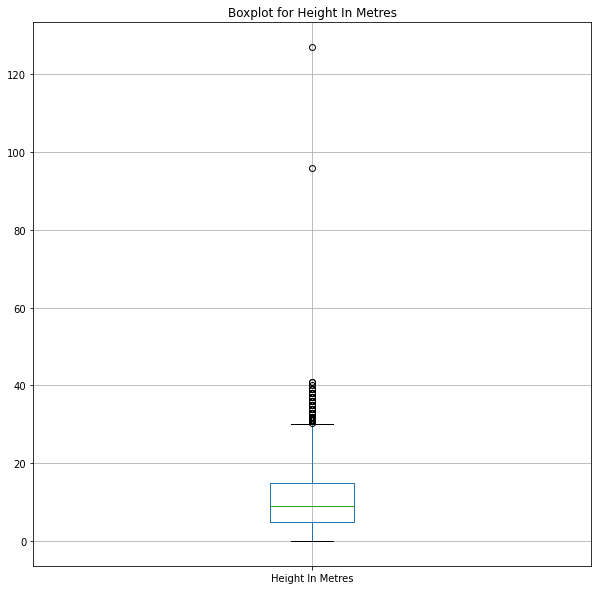

In [62]:
trees.boxplot('Height In Metres', figsize=(10, 10))
plt.title('Boxplot for Height In Metres')
plt.show()

Select the crazy outlier rows:

In [63]:
trees[trees['Height In Metres'] > 50]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1356,00001547,1.0,Beaumont Walk Estate,Housing,Robinia pseudoacacia,2017-05-23,2020/2021,96.0,10.0,63.0,E05000136,Haverstock,527847.0,184391.0,-0.157739,51.543941,"(51.543941, -0.157739)"
1863,00013862,1.0,Maitland Park Estate 1,Housing,Prunus avium,2017-05-16,2020/2021,127.0,9.0,34.0,E05000136,Haverstock,527987.0,184901.0,-0.155534,51.548497,"(51.548497, -0.155534)"


<hr/>

### 5.2 Outliers for Spread
Now let's repeat the analysis for spread:


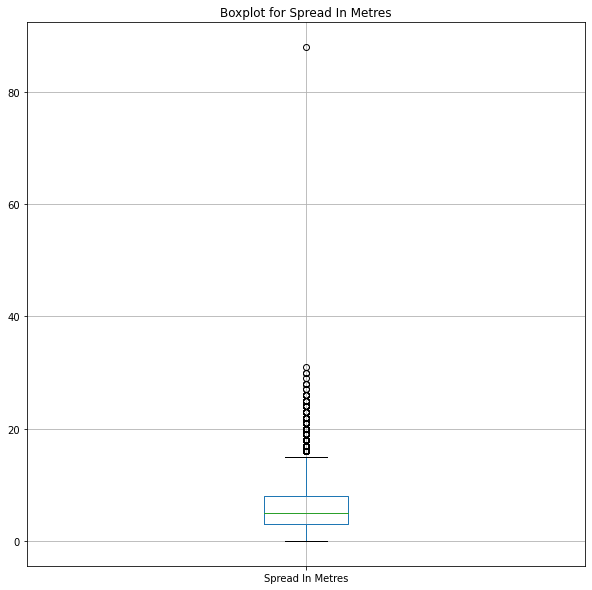

In [64]:
trees.boxplot('Spread In Metres', figsize=(10, 10))
plt.title('Boxplot for Spread In Metres')
plt.show()

In [65]:
trees[trees['Spread In Metres'] > 40]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
18567,00045515,1.0,Broadfield Estate 1,Housing,Quercus robur,2018-04-26,2021/2022,8.0,88.0,17.0,E05000144,Swiss Cottage,525993.0,184693.0,-0.184348,51.547074,"(51.547074, -0.184348)"


<hr/>

### 5.3 Outliers for Diameter
Repeat the analysis for diameter.


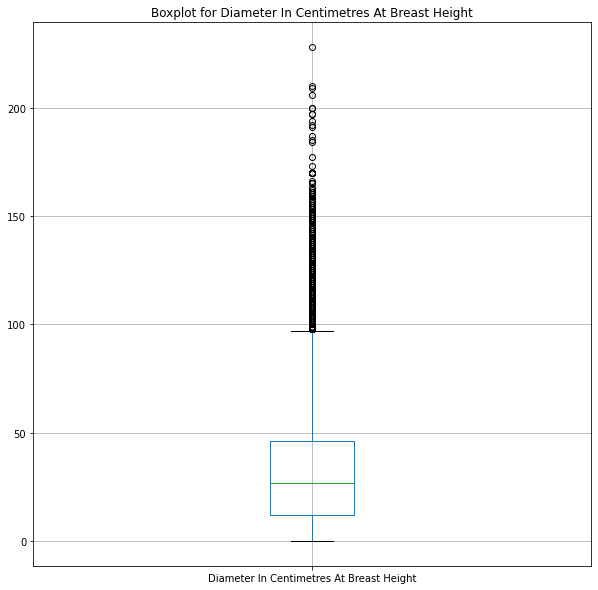

In [66]:
trees.boxplot('Diameter In Centimetres At Breast Height', figsize=(10, 10))
plt.title('Boxplot for Diameter In Centimetres At Breast Height')
plt.show()

In [67]:
trees[trees['Diameter In Centimetres At Breast Height'] > 200]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
1157,00004100,1.0,"LONGFORD STREET, CLARENCE GDNS (LS)",Parks,Platanus x hispanica,2018-03-29,2020/2021,21.0,20.0,228.0,E05000142,Regent's Park,528931.0,182624.0,-0.142766,51.527816,"(51.527816, -0.142766)"
11860,00012885,1.0,"LINCOLN'S INN FIELDS, GARDENS (LS)",Parks,Platanus x hispanica,2018-04-20,2021/2022,24.0,24.0,210.0,E05000138,Holborn and Covent Garden,530820.0,181358.0,-0.116011,51.516010,"(51.51601, -0.116011)"
14178,00012891,1.0,"LINCOLN'S INN FIELDS, GARDENS (LS)",Parks,Platanus x hispanica,2018-04-20,2021/2022,30.0,20.0,206.0,E05000138,Holborn and Covent Garden,530783.0,181341.0,-0.116553,51.515861,"(51.515861, -0.116553)"
15853,00012939,1.0,"LINCOLN'S INN FIELDS, GARDENS (LS)",Parks,Platanus x hispanica,2018-04-19,2021/2022,23.0,20.0,209.0,E05000138,Holborn and Covent Garden,530705.0,181373.0,-0.117672,51.516165,"(51.516165, -0.117672)"


<hr/>

### 5.4 Observations



- Boxplot for *Height In Metres* shows the typical values of this field. It's clearly seen that all the crazy values are at values greater than 50 m. The outliers in the tree height column - two rows, where Height In Metres is 96 m and 127 m.
- Boxplot for *Spread In Metres* shows the only crazy value. All the typical values are less than 40 m. The outliers in the spread column - the only row with Spread In Metres of 88 m.
- The *Diameter In Centimetres At Breast Height* values greater than 200 m are very rare. I assume that the threshold of 200 is appropriate here. The outliers in the diameter column - four rows, where Diameter In Centimetres At Breast Height are 206, 209, 210 and 228 m.

It was pretty easy to define outliers of *Height In Metres* and *Spread In Metres*. *Diameter In Centimetres At Breast Height* values have a smaller throw, so the threshold for this column was not that obvious. I suppose, it may still be adjusted, e.g. value of 210 is also suitable.

<hr/>

## Task 6: Identify Duplicates in the Trees Dataset
Sometimes data has duplicate entries.  This is another sign of data quality issues!

### 6.1 Find Duplicate Rows

In our dataset the `Identifier` column should be unique. Let's find out if we have any duplicates.


In [68]:
trees_duplicates = (trees['Identifier']
                    .value_counts()
                    .reset_index()
                   )
trees_duplicates = trees_duplicates[trees_duplicates['Identifier'] >= 2]
trees_duplicates

,index,Identifier
0,00000999,2
1,00060087,2
2,00022744,2
3,00032549,2
4,00022674,2
5,00060088,2


Now let's select the rows from trees DataFrame that are duplicates.

In [69]:
(trees[trees['Identifier']
       .isin(trees_duplicates['index']) == True]
       .sort_values(by='Identifier', ascending=True)
)

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
5491,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
13098,00000999,1.0,ALMA STREET,Highways,Sorbus hupehensis,2017-07-25,2020/2021,5.0,4.0,18.0,E05000139,Kentish Town,528834.0,184856.0,-0.143337,51.547904,"(51.547904, -0.143337)"
9482,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"
13628,00022674,1.0,WOODSOME ROAD,Highways,Sorbus,2017-10-07,2020/2021,7.0,6.0,28.0,E05000137,Highgate,528515.0,186109.0,-0.147481,51.559237,"(51.559237, -0.147481)"
7027,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
9186,00022744,1.0,YORK WAY,Highways,Ailanthus altissima,2019-10-30,2022/2023,7.5,3.0,18.0,E05000131,Cantelowes,529983.0,184724.0,-0.126837,51.546447,"(51.546447, -0.126837)"
4388,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
6111,00032549,1.0,NARCISSUS ROAD,Highways,Betula albosinensis Fasc.,2018-09-19,2021/2022,9.0,6.0,19.0,E05000145,West Hampstead,525185.0,185127.0,-0.195840,51.551159,"(51.551159, -0.19584)"
15393,00060087,1.0,ARGYLE SQUARE,Highways,Vacant Tree Pit (planned: Access),2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530342.0,182839.0,-0.122352,51.529428,"(51.529428, -0.122352)"
15653,00060087,1.0,ARGYLE SQUARE,Highways,Vacant Tree Pit (planned: Acer campestre eco s...,2019-11-09,2022/2023,NaN,NaN,NaN,E05000141,King's Cross,530342.0,182839.0,-0.122352,51.529428,"(51.529428, -0.122352)"


<hr/>

### 6.2 Observations



Six non-unique identifiers were found. To see them all the rows from trees DataFrame that are duplicates were selected and displayed.

<hr/>

## Task 7: Identify Geolocation Issues
The geographic coordinates (Easting and Northing) can be used to plot the trees on a map.  We can use this approach to see if there are any unusual tree locations!

We will make a copy of the original trees dataset and remove any rows that have a missing easting or northing as these can't be plotted on the map.

### 7.1 Remove Trees with Missing Geo-coordinates
Check if there are any rows with null or 0 geo-coordinates.  If there are, remove them as we can't plot these.

Make a copy of the trees:

In [70]:
geotrees = trees.copy()

Remove null Eastings:

In [71]:
geotrees = geotrees[geotrees['Easting'].isnull() == False]

Remove 0 Eastings. 

In [72]:
geotrees = geotrees[geotrees['Easting'] != 0]

Remove null Northings:

In [73]:
geotrees = geotrees[geotrees['Northing'].isnull() == False]

Remove 0 Northings. 

In [74]:
geotrees = geotrees[geotrees['Northing'] != 0]

Confirm how many rows we have:

In [75]:
geotrees.shape

(23388, 17)

<hr/>

### 7.2 Plot Map of Trees
Now let's make the plot, a scatter plot of Northing vs Easting. First we should obtain an outline of the map of Camden, then compare that outline with a real map of Camden. We’ll be able to spot the trees that should not be in that dataset from there!


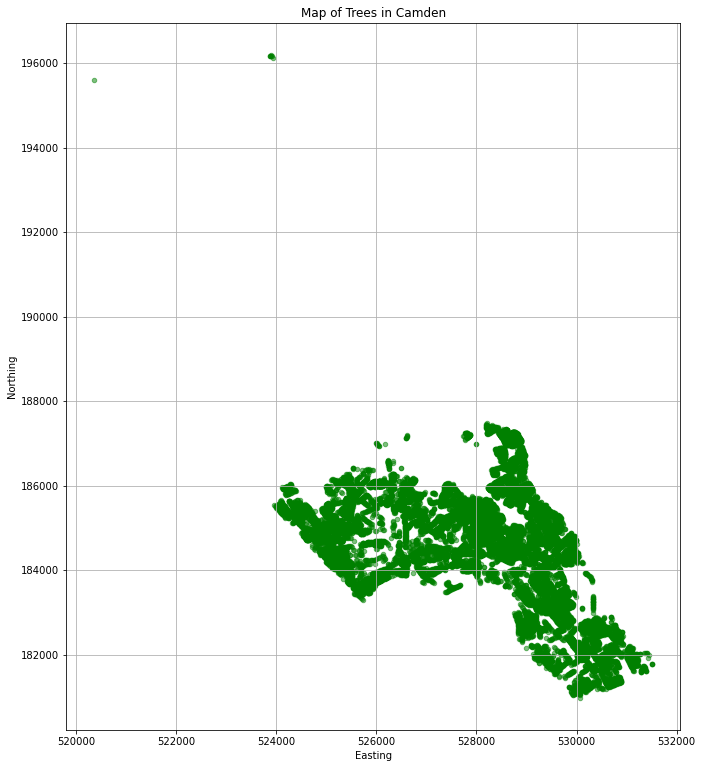

In [76]:
ax = geotrees.plot(x='Easting',
                   y='Northing',
                   kind='scatter',
                   figsize=(11, 13),
                   color='green',
                   alpha = 0.5,
                   grid=True)
ax.set_title('Map of Trees in Camden')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
plt.show()

The outline of the map of Camden:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Camden_UK_ward_map_1978.svg/2076px-Camden_UK_ward_map_1978.svg.png" width=400 height=400 />

### 7.3 Find Trees Outside Camden
From the scatter plot, we are now able to determine how to select the rows from the trees data set containing the offending trees (using the Easting and Northing values)


In [77]:
geotrees[geotrees['Northing'] > 188000]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
78,00044991,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,20.0,10.0,49.0,NaN,NaN,523883.0,196179.0,-0.210713,51.650765,"(51.650765, -0.210713)"
298,00045000,1.0,Estate 167 Furzehill Road,Housing,Pinus sylvestris,2017-04-28,2020/2021,10.0,3.0,41.0,NaN,NaN,520367.0,195595.0,-0.261719,51.646283,"(51.646283, -0.261719)"
660,00044992,1.0,Bells Hill Estate,Housing,Crataegus monogyna,2017-04-28,2020/2021,4.0,4.0,7.0,NaN,NaN,523875.0,196170.0,-0.210830,51.650690,"(51.65069, -0.21083)"
1526,00044995,1.0,Bells Hill Estate,Housing,Fraxinus excelsior,2017-04-28,2020/2021,18.0,12.0,54.0,NaN,NaN,523936.0,196127.0,-0.209969,51.650287,"(51.650287, -0.209969)"
5392,00044990,1.0,Bells Hill Estate,Housing,Aesculus hippocastanum,2017-04-28,2020/2021,22.0,12.0,67.0,NaN,NaN,523889.0,196188.0,-0.210618,51.650843,"(51.650843, -0.210618)"
18069,00044993,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,23.0,14.0,89.0,NaN,NaN,523867.0,196159.0,-0.210957,51.650590,"(51.65059, -0.210957)"
18078,00044601,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,56.0,NaN,NaN,523905.0,196174.0,-0.210394,51.650719,"(51.650719, -0.210394)"
19532,00044988,1.0,Bells Hill Estate,Housing,Tilia cordata,2017-04-28,2020/2021,21.0,12.0,65.0,NaN,NaN,523909.0,196169.0,-0.210340,51.650676,"(51.650676, -0.21034)"


Confirm how many rows we have:

In [78]:
print('Number of trees out of Camden:', geotrees[geotrees['Northing'] > 188000]['Identifier'].count())

Number of trees out of Camden: 8


<hr/>

### 7.4 Observations



The map of trees in Camden was plotted and compared with Camden outline. Several trees on the map that are not actually in Camden are observed. Then the rows containing trees outside of Camden were selected and displayed. The total number of those trees is 8.

<hr/>

## Task 8: Identify Unmatched Data
We have multiple datasets that will need to be joined together to produce the analyses required by the council.  The data will need to be joined in the following way:

- Use the `Identifier` column in the trees dataset to match to the `Identifier` column in the environmental data set (so we can bring in the environmental data for each tree)
- Use the `Scientific Name` column in the trees dataset to match to the `Scientific Name` column in the common names data set (so we can look up the `Common Name`)

There may be mismatches in the data.  Of particular concern we want to check:

- That every tree in the trees dataset has matching environmental data in the environmental data set
- That every environmental row in the environmental dataset has matching tree data in the tree data set
- That every scientific name in the trees dataset has a matching common name in the common names data set

We aren't too concerned about the reverse of the last scenario (if we have extra names in the common names dataset that aren't in the trees data set).  We don't expect Camden to have a specimen of every tree that exists.

### 8.1 Find Trees that Don't have Matching Environmental Data
Find trees that don't have matching environmental data:

In [79]:
trees[trees['Identifier'].isin(environmental['Identifier']) == False]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
66,00059712,1.0,Maiden Lane Estate,Housing,Acer saccharinum,2019-05-28,2022/2023,12.0,5.0,20.0,E05000131,Cantelowes,529795.0,184142.0,-0.129750,51.541266,"(51.541266, -0.12975)"
125,00048578,1.0,BUCK STREET,Highways,Sorbus aucuparia,2017-07-19,2020/2021,6.0,2.0,10.0,E05000130,Camden Town with Primrose Hill,528900.0,184020.0,-0.142698,51.540371,"(51.540371, -0.142698)"
1148,00006577,1.0,FAWLEY ROAD,Highways,Tilia euchlora,2018-09-28,2021/2022,15.0,6.0,38.0,E05000145,West Hampstead,525572.0,185015.0,-0.190313,51.550062,"(51.550062, -0.190313)"
1998,00007366,1.0,"FORTUNE GREEN RD, OPEN SPACE (LS)",Parks,Ilex aquifolium,2017-03-21,2019/2020,9.0,6.0,44.0,E05000132,Fortune Green,525074.0,185541.0,-0.197304,51.554901,"(51.554901, -0.197304)"
2246,00014633,1.0,Mortimer Estate,Housing,Tilia europaea,2019-01-29,2021/2022,16.0,12.0,47.0,E05000140,Kilburn,525763.0,183613.0,-0.188060,51.537424,"(51.537424, -0.18806)"
5478,00060382,1.0,SHAFTESBURY AVENUE,Highways,Vacant Tree Pit,NaT,NaN,NaN,NaN,NaN,E05000138,Holborn and Covent Garden,530073.0,181247.0,-0.126813,51.515186,"(51.515186, -0.126813)"
10637,00002874,1.0,BURGHLEY ROAD,Highways,Platanus x hispanica,2017-08-14,2020/2021,20.0,8.0,52.0,E05000139,Kentish Town,529119.0,185889.0,-0.138863,51.557120,"(51.55712, -0.138863)"
10977,00055227,1.0,BURGHLEY ROAD,Highways,Amelanchier lamarckii,2017-08-14,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,528920.0,185694.0,-0.141802,51.555408,"(51.555408, -0.141802)"
11795,00016702,1.0,"RED LION SQUARE, GARDENS (LS)",Parks,Platanus x hispanica,2018-06-04,2021/2022,30.0,23.0,165.0,E05000138,Holborn and Covent Garden,530572.0,181701.0,-0.119460,51.519146,"(51.519146, -0.11946)"
11856,00054744,1.0,Carrol & Sanderson Close Estate,Housing,Prunus unidentified species,2017-01-06,2020/2021,3.0,3.0,13.0,E05000137,Highgate,528661.0,185556.0,-0.145585,51.554226,"(51.554226, -0.145585)"


Confirm how many rows we have:

In [80]:
trees[trees['Identifier'].isin(environmental['Identifier']) == False]['Identifier'].count()

23

### 8.2 Find Environmental Data that Doesn't have Matching Tree Data
Find environmental data that doesn't have matching tree data

In [81]:
environmental[environmental['Identifier'].isin(trees['Identifier']) == False]

,Identifier,Maturity,Physiological Condition,Tree Set To Be Removed,Removal Reason,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams


Confirm how many rows we have:

In [82]:
environmental[environmental['Identifier'].isin(trees['Identifier']) == False]['Identifier'].count()

0

### 8.3 Find Trees that Don't have Matching Common Names Data
Find trees with scientific names that don't have matching common names data:

In [83]:
trees[trees['Scientific Name'].isin(tree_common_names['Scientific Name']) == False]

,Identifier,Number Of Trees,Site Name,Contract Area,Scientific Name,Inspection Date,Inspection Due Date,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Location
151,00051832,1.0,ARGYLE WALK,Highways,Sorbus aucuparia 'Streetwise',2019-02-10,2022/2023,7.0,3.0,12.0,E05000141,King's Cross,530227.0,182706.0,-0.124054,51.528257,"(51.528257, -0.124054)"
384,00053954,1.0,CHURCHILL ROAD,Highways,Sorbus aucuparia 'Streetwise',2017-10-07,2020/2021,3.0,2.0,5.0,E05000139,Kentish Town,529007.0,185975.0,-0.140440,51.557913,"(51.557913, -0.14044)"
495,00047497,1.0,PATSHULL PLACE,Highways,Sorbus aucuparia 'Streetwise',2017-06-22,2020/2021,5.0,3.0,11.0,E05000131,Cantelowes,529202.0,184717.0,-0.138094,51.546569,"(51.546569, -0.138094)"
611,00055434,1.0,SHARPLES HALL STREET,Highways,Sorbus aucuparia 'Streetwise',2019-09-30,2022/2023,2.0,2.0,4.0,E05000130,Camden Town with Primrose Hill,527962.0,184050.0,-0.156202,51.540853,"(51.540853, -0.156202)"
653,00055289,1.0,QUEEN'S CRESCENT,Highways,Sorbus aucuparia 'Streetwise',2017-07-08,2020/2021,4.0,1.0,7.0,E05000136,Haverstock,528072.0,184723.0,-0.154369,51.546881,"(51.546881, -0.154369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21826,00050835,1.0,INGESTRE RD,Highways,Sorbus aucuparia 'Streetwise',2017-08-18,2020/2021,3.0,1.0,7.0,E05000139,Kentish Town,528962.0,185826.0,-0.141137,51.556589,"(51.556589, -0.141137)"
22948,00052341,1.0,NEW COMPTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-07-08,2022/2023,4.0,3.0,6.0,E05000138,Holborn and Covent Garden,529976.0,181160.0,-0.128249,51.514422,"(51.514422, -0.128249)"
23266,00048846,1.0,ASMARA ROAD,Highways,Sorbus aucuparia 'Streetwise',2018-08-28,2021/2022,5.0,3.0,8.0,E05000132,Fortune Green,524568.0,185347.0,-0.204661,51.553268,"(51.553268, -0.204661)"
23335,00048705,1.0,GOLDINGTON STREET,Highways,Sorbus aucuparia 'Streetwise',2019-10-23,2022/2023,6.0,2.0,12.0,E05000143,St Pancras and Somers Town,529662.0,183417.0,-0.131941,51.534780,"(51.53478, -0.131941)"


Confirm how many rows we have:

In [84]:
trees[trees['Scientific Name'].isin(tree_common_names['Scientific Name']) == False]['Scientific Name'].count()

76

<hr/>

### 8.4 Observations


There are some mismatches in the data. The particular matshes have been checked:

- That every tree in the trees dataset has matching environmental data in the environmental data set. As a result 23 mismatches have been found;
- That every environmental row in the environmental dataset has matching tree data in the tree data set. Here no mismatches were found;
- That every scientific name in the trees dataset has a matching common name in the common names data set. We found 76 mismatches.

<hr/>

# Conclusions
How the requirements are met by the data.

| Requirement | Data File | Additional Data Required | Usage |
| --- | --- | --- | --- |
| Tree Walks Brochure | Trees Data, Common Names Data | Parks location, walking routes, what the interesting trees are? | To create a guided walk showing a map of the location of interesting trees (using a map visualisation tool). To make Brochures more user friendly, recommended to add common trees names to the Trees Data |
| Environment Report | Environmental Data, Trees Data, Common Names Data | Need to fill the missing data. No additional data required | To create a single page showing the total carbon and pollution benefit provided by all their trees (public accessible). All the DataFrames will be merged. Then the data will be probably grouped by site name or/and contract area to generate an Environment Report |
| Public Tree Data | Trees Data | Need to fill the missing data only | Fill the missing data and publish on the Council website |